Using PyTorch write the following function $f(\phi) = (x - x_0)^2 + 0.2(y-y_0)^2$ as a functionof the vector-like parameter $\phi = (x,y)$ with $x_0 = 1, y_0 = 2$

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

def func(pars):
    x,y = pars[...,0],pars[...,1]
    x0 = 1
    y0 = 2
    value = (x-x0)**2 + 0.2*(y-y0)**2
    return value

Evaluate the function on the space -2 < x < 4 and -2 < y < 4 and draw the iso-lines for constance f

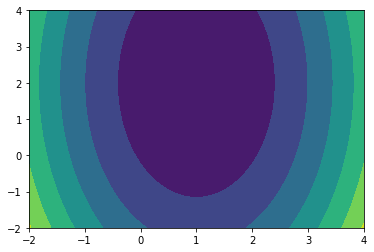

In [3]:
grid = np.mgrid[-2:4:101j,-2:4:101j]
Xi = np.swapaxes(grid,0,-1).reshape(-1,2)
yi = func(torch.FloatTensor(Xi))
yi = yi.reshape(101,101).T
plt.contourf(grid[0],grid[1],yi)

Using PyTorch’s `.backward()` API, implement a manual version of gradient descent of the function from the last section.

Tip: the parameter update is best done using the following

```
with torch.no_grad():
     pars = …. new parameters
     pars.requires_grad = True
```

Write the function such that you track the intermediate positions $(x,y)$ and the function value


In [24]:
def manual_gradient_descent(init):
    traj = []
    pars = torch.tensor(init, requires_grad = True)
    for i in range(5000):
        out = func(pars)
        out.backward()
        with torch.no_grad():
            pars = pars - 0.001*pars.grad
            pars.requires_grad = True
        if i % 100 == 0:
            traj.append(np.concatenate([np.copy(pars.detach().numpy()),[float(out)]]))
    traj = np.array(traj)
    return traj

t1 = manual_gradient_descent([3.,4.])
t2 = manual_gradient_descent([-2.,-4.])

Run Gradient Decent from a few initializations points and plot the trajectories

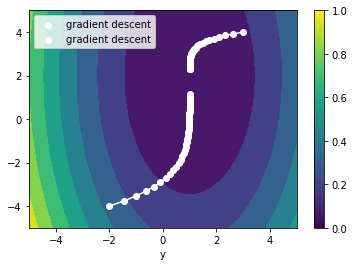

In [25]:
grid = np.mgrid[-5:5:101j,-5:5:101j]
Xi = np.swapaxes(grid,0,-1).reshape(-1,2)
yi = func(torch.FloatTensor(Xi))
yi = yi.reshape(101,101).T
plt.contourf(grid[0],grid[1],yi)
for traj in [t1,t2]:
    plt.plot(traj[:,0],traj[:,1], c = 'w')
    plt.scatter(traj[:,0],traj[:,1], c = 'w', label = 'gradient descent')
plt.legend()
plt.xlabel('x')
plt.xlabel('y')
plt.colorbar()

Perform an Optimization on the above problem using the torch.nn.Adam optimizer and compare it to the manual gradient descent

In [29]:
def adam_gradient_descent(init):
    traj = []
    pars = torch.tensor(init, requires_grad = True)
    opt = torch.optim.Adam([pars],1e-3)
    for i in range(5000):
        out = func(pars.requires_grad_(True))
        out.backward()
        opt.step()
        opt.zero_grad()
        if i % 100 == 0:
            traj.append(np.concatenate([np.copy(pars.detach().numpy()),[float(out)]]))
    traj = np.array(traj)
    return traj

t1_gd = manual_gradient_descent([4.,4.])
t2_adam = adam_gradient_descent([4.,4.])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


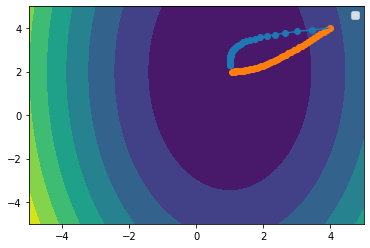

In [31]:
grid = np.mgrid[-5:5:101j,-5:5:101j]
Xi = np.swapaxes(grid,0,-1).reshape(-1,2)
yi = func(torch.FloatTensor(Xi))
yi = yi.reshape(101,101).T
plt.contourf(grid[0],grid[1],yi)
for traj,names in zip([t1_gd,t2_adam], ['GD','Adam']):
    plt.plot(traj[:,0],traj[:,1])
    plt.scatter(traj[:,0],traj[:,1])
plt.legend()

Plot the function value $f(\phi)$ as a function of the iteration step

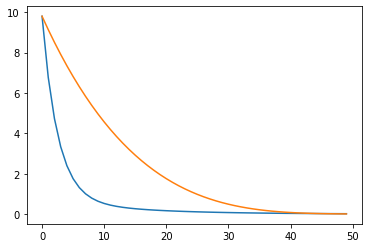

In [32]:
plt.plot(t1[:,-1], label = 'GD')
plt.plot(t2[:,-1], label = 'Adam')